In [260]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate

from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

# Data Import

This section involves importing the data into the code and reading it as pandas dataframe.

### Read the data

Training data from a different file or location can be read by __changing the argument value__ of the `pd.read_csv()` function with the path to the file.

In [2]:
train_data=pd.read_csv('CreditCard_train.csv')

In [3]:
train_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
train_data.rename(columns=(train_data.iloc[0]),inplace=True)
train_data.drop(index=[0],inplace=True)
train_data.rename(columns={'default payment next month':'Y'},inplace=True)

In [5]:
train_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
train_data.dtypes

ID           object
LIMIT_BAL    object
SEX          object
EDUCATION    object
MARRIAGE     object
AGE          object
PAY_0        object
PAY_2        object
PAY_3        object
PAY_4        object
PAY_5        object
PAY_6        object
BILL_AMT1    object
BILL_AMT2    object
BILL_AMT3    object
BILL_AMT4    object
BILL_AMT5    object
BILL_AMT6    object
PAY_AMT1     object
PAY_AMT2     object
PAY_AMT3     object
PAY_AMT4     object
PAY_AMT5     object
PAY_AMT6     object
Y            object
dtype: object

From the above line it can be seen that all the columns have been read as type object. Since all our column contain numerical data of integer type all the column datatype can be converted to int.

In [7]:
train_data=train_data.astype(int)

# Data Transformation and Exploration

### Analysing the data 

First the number of unique entries in each column was verified to identify the categorical variables and to cross-check if they have the same number of categories as in the documentation or not.

In [8]:
train_data.nunique()

ID           24000
LIMIT_BAL       79
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             55
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    18717
BILL_AMT2    18367
BILL_AMT3    18132
BILL_AMT4    17720
BILL_AMT5    17284
BILL_AMT6    16906
PAY_AMT1      6918
PAY_AMT2      6839
PAY_AMT3      6424
PAY_AMT4      6028
PAY_AMT5      5984
PAY_AMT6      5988
Y                2
dtype: int64

We can see inconsistensies in the above result. For example, PAY_2 was expected to have only 10 unique values however it has 11.

For further exploration, we now analyse the features one-by-one.

#### ID

ID has been set as index since this feature does not determine the outcome Y.

In [9]:
train_data.set_index('ID',inplace=True)

#### LIMIT_BAL

`LIMIT_BAL` is not categorical variable hence we will analyse the distribution.

In [10]:
print('Minimum is: %d'%train_data['LIMIT_BAL'].min())
print('Maximum is: %d'%train_data['LIMIT_BAL'].max())

Minimum is: 10000
Maximum is: 1000000


Using the histogram we are going to see how many entries fall under each class. Number of bins chosen is __30__ so the class size is __33000 NT dollar__.

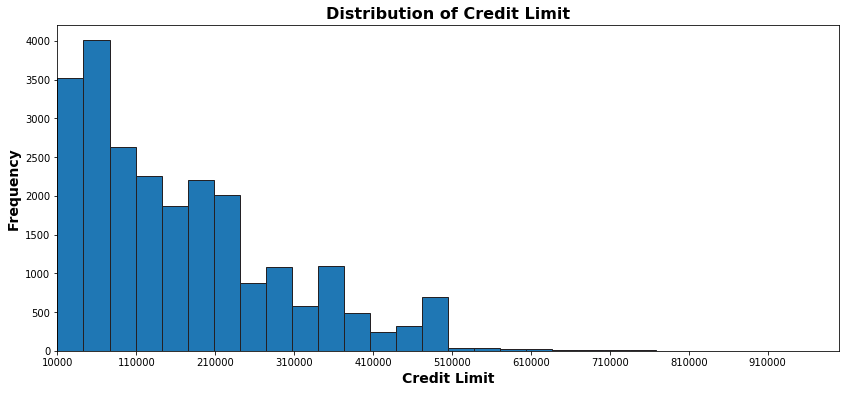

In [11]:
plt.figure(figsize = (14,6))
plt.xlim((10000,1000000))
plt.xticks(np.arange(10000,1000000,100000))
plt.hist(train_data['LIMIT_BAL'],range=[10000,1000000],bins=30,edgecolor='#242124')
plt.title('Distribution of Credit Limit',fontsize=16,fontweight='bold')
plt.xlabel('Credit Limit',fontsize=14,fontweight='bold')
plt.ylabel('Frequency',fontsize=14,fontweight='bold')
plt.show()

In [12]:
df_credlim=pd.DataFrame({'0':train_data[train_data['Y']==0]['LIMIT_BAL']})
df_credlim['1']=train_data[train_data['Y']==0]['LIMIT_BAL']

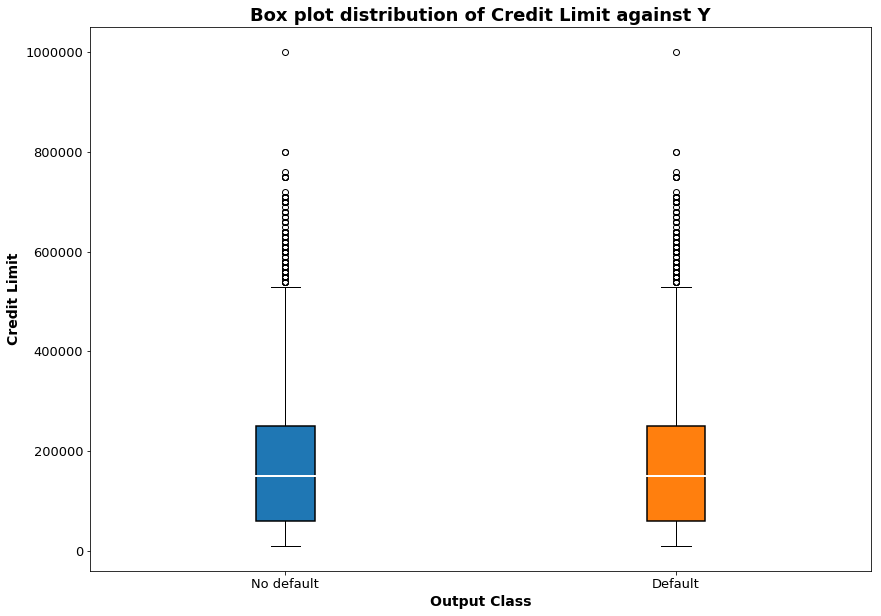

In [273]:
plt.figure(figsize = (14,10))
b=plt.boxplot([df_credlim['0'],df_credlim['1']],
             labels=['No default','Default'],
             showfliers=True,
             patch_artist=True,
             medianprops={'linewidth':2,'color':'w'},
             boxprops={'linewidth':1.5})
b['boxes'][0].set_facecolor('#1f77b4')
b['boxes'][1].set_facecolor('#ff7f0e')
plt.title('Box plot distribution of Credit Limit against Y',fontsize=18,fontweight='bold')
plt.xlabel('Output Class',fontsize=14,fontweight='bold')
plt.ylabel('Credit Limit',fontsize=14,fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

#### SEX

`SEX` takes __two__ values from __[1, 2]__ .

We will now have a look at the default rate of each sex. This will allow us to see if there is any relationship between them, or if it is a feature of less importance. 

In [14]:
ct1=pd.crosstab(train_data['SEX'], train_data['Y'])
ct1

Y,0,1
SEX,,
1,6735,2187
2,11895,3183


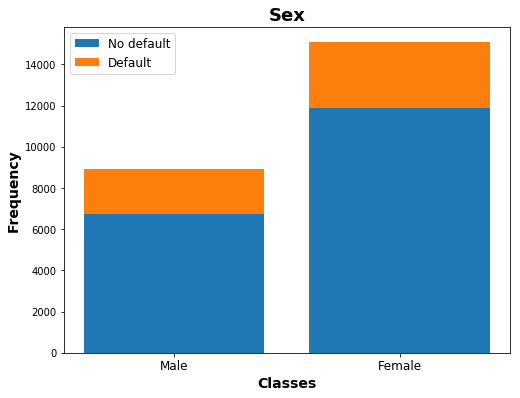

In [15]:
plt.figure(figsize = (8,6))
index=np.arange(2)
b1=plt.bar(index,list(ct1[0]),label='No default')
b2=plt.bar(index,list(ct1[1]),bottom=list(ct1[0]),label='Default')
plt.xticks(index,labels=['Male','Female'],fontsize=12)
plt.title('Sex',fontsize=18,fontweight='bold')
plt.xlabel('Classes',fontsize=14,fontweight='bold')
plt.ylabel('Frequency',fontsize=14,fontweight='bold')
plt.legend(fontsize=12)
plt.show()

In [16]:
print('Male default rate: %0.3f'%(ct1[1][1]/np.array(ct1.iloc[0]).sum()))
print('Female default rate: %0.3f'%(ct1[1][2]/np.array(ct1.iloc[1]).sum()))

Male default rate: 0.245
Female default rate: 0.211


From the above chart, we can see that males have a default rate of 24.5% while female default rate was 21.1%. Hence, males are more likely to default on their credit card. It should also be noted that there is a imbalance in the number of samples under each category (we have more females than males in the data set) which could affect model performance; some algorithms deal with this better than others. 

#### EDUCATION

`EDUCATION` is supposed to take the values from __[ 1 , 2 , 3 , 4 ]__ but from line [9] we know it takes __seven__ unique values.

In [17]:
pd.DataFrame(train_data['EDUCATION'].value_counts().sort_index())

,EDUCATION
0,11
1,8443
2,11360
3,3850
4,92
5,207
6,37


Accordingly to the supplmentary information, 0, 5 and 6 are undocumented. Therefore, meaning of these labels are unknown so it is a reasonable deicison to move them to class 4 (other). This could potentially introduce a error as the data may have simply been misclassed in the first place, but now has been moved to the class other. The other option would be to completely remove the data which could be detrimental to the performance as well due to the reduction in training data. 

In [18]:
train_data['EDUCATION'].loc[(train_data['EDUCATION']==0)|(train_data['EDUCATION']==5)|(train_data['EDUCATION']==6)]=4

In [19]:
ct2=pd.crosstab(train_data['EDUCATION'], train_data['Y'])
ct2

Y,0,1
EDUCATION,,
1,6791,1652
2,8645,2715
3,2869,981
4,325,22


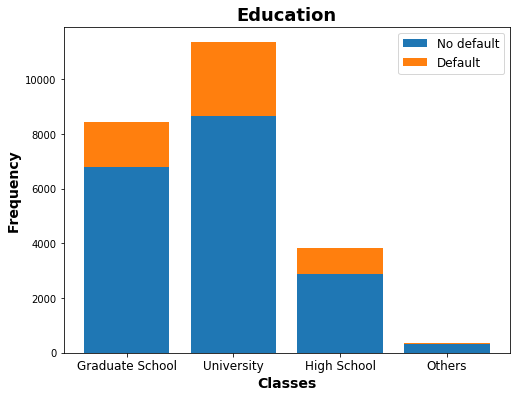

In [20]:
plt.figure(figsize = (8,6))
index=np.arange(4)
b1=plt.bar(index,list(ct2[0]),label='No default')
b2=plt.bar(index,list(ct2[1]),bottom=list(ct2[0]),label='Default')
plt.xticks(index,labels=['Graduate School','University','High School','Others'],fontsize=12)
plt.title('Education',fontsize=18,fontweight='bold')
plt.xlabel('Classes',fontsize=14,fontweight='bold')
plt.ylabel('Frequency',fontsize=14,fontweight='bold')
plt.legend(fontsize=12)
plt.show()

In [21]:
print('Graduate School- Default rate: %0.3f'%(ct2[1][1]/np.array(ct2.iloc[0]).sum()))
print('University- Default rate: %0.3f'%(ct2[1][2]/np.array(ct2.iloc[1]).sum()))
print('High School- Default rate: %0.3f'%(ct2[1][3]/np.array(ct2.iloc[2]).sum()))
print('Others- Default rate: %0.3f'%(ct2[1][4]/np.array(ct2.iloc[3]).sum()))

Graduate School- Default rate: 0.196
University- Default rate: 0.239
High School- Default rate: 0.255
Others- Default rate: 0.063


From the educational data, those with only high-school level qualification seems to have the highest rate of default at 25.5% while 'other' had the lowest. However, it should be noted that the 'other' class is very small for us to say with a high level of confidence that this group would in practice have the lowest rate of default.Those who fall into other could include both the extremes such as those with a PhD or if they did not complete high school. Intuitively, one could consider the relative financial security of those of different educational background. It would seem reasonable to assume that those from a graduate school would be better equiped to deal with their personal finance than a high school student hence should lead to lower rate of default. The data agrees with this.  

#### MARRIAGE

`MARRIAGE` is supposed to take the values from __[ 1 , 2 , 3 ]__ but from line [9] we know it takes __four__ unique values.

In [22]:
pd.DataFrame(train_data['MARRIAGE'].value_counts().sort_index())

,MARRIAGE
0,41
1,10813
2,12877
3,269


0 is undocumented. However since the meaning of these labels are unknown it makes sense to replace the values by class 3 which means others.

In [23]:
train_data['MARRIAGE'].loc[(train_data['MARRIAGE']==0)]=3

In [24]:
ct3=pd.crosstab(train_data['MARRIAGE'], train_data['Y'])
ct3

Y,0,1
MARRIAGE,,
1,8236,2577
2,10156,2721
3,238,72


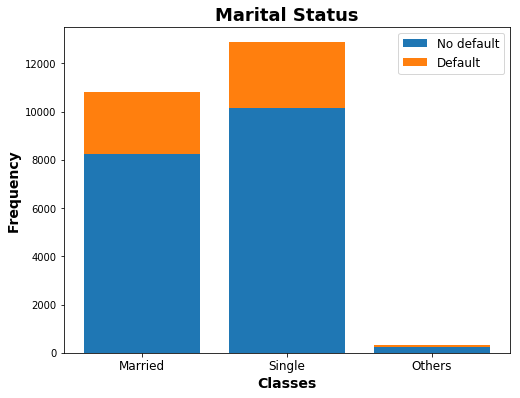

In [25]:
plt.figure(figsize = (8,6))
index=np.arange(3)
b1=plt.bar(index,list(ct3[0]),label='No default')
b2=plt.bar(index,list(ct3[1]),bottom=list(ct3[0]),label='Default')
plt.xticks(index,labels=['Married','Single','Others'],fontsize=12)
plt.title('Marital Status',fontsize=18,fontweight='bold')
plt.xlabel('Classes',fontsize=14,fontweight='bold')
plt.ylabel('Frequency',fontsize=14,fontweight='bold')
plt.legend(fontsize=12)
plt.show()

In [26]:
print('Married- default rate: %0.3f'%(ct3[1][1]/np.array(ct3.iloc[0]).sum()))
print('Single- default rate: %0.3f'%(ct3[1][2]/np.array(ct3.iloc[1]).sum()))
print('Others- default rate: %0.3f'%(ct3[1][3]/np.array(ct3.iloc[2]).sum()))

Married- default rate: 0.238
Single- default rate: 0.211
Others- default rate: 0.232


#### AGE

`AGE` is not categorical variable hence we will analyse the distribution.

In [27]:
print('Minimum is: %d'%train_data['AGE'].min())
print('Maximum is: %d'%train_data['AGE'].max())

Minimum is: 21
Maximum is: 79


Using the histogram we are going to see how many entries fall under each class. Number of bins chosen is __58__ so the class size is __1 year__.

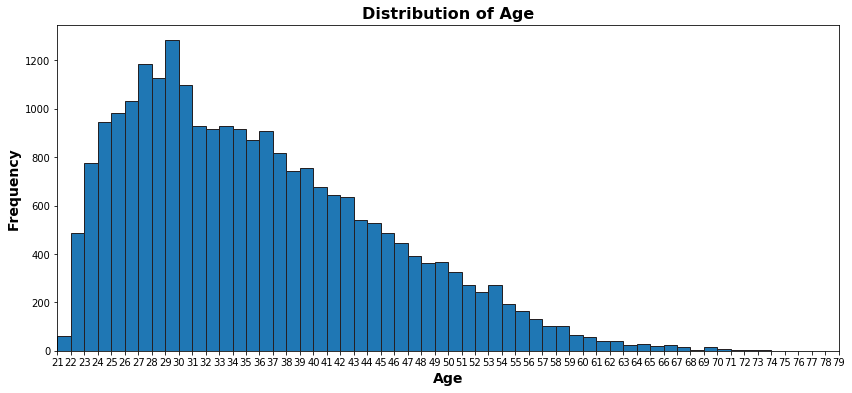

In [28]:
plt.figure(figsize = (14,6))
plt.xlim((21,79))
plt.xticks(np.arange(21,80))
plt.hist(train_data['AGE'],range=[21,79],bins=58,edgecolor='#242124')
plt.title('Distribution of Age',fontsize=16,fontweight='bold')
plt.xlabel('Age',fontsize=14,fontweight='bold')
plt.ylabel('Frequency',fontsize=14,fontweight='bold')
plt.show()

In [29]:
df_age=pd.DataFrame({'0':train_data[train_data['Y']==0]['AGE']})
df_age['1']=train_data[train_data['Y']==0]['AGE']

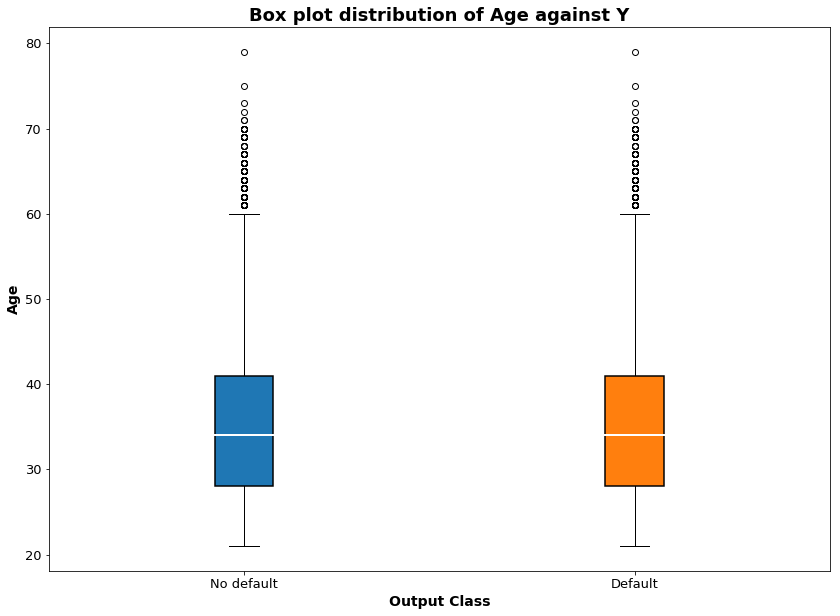

In [272]:
plt.figure(figsize = (14,10))
b=plt.boxplot([df_age['0'],df_age['1']],
             labels=['No default','Default'],
             showfliers=True,
             patch_artist=True,
             medianprops={'linewidth':2,'color':'w'},
             boxprops={'linewidth':1.5})
b['boxes'][0].set_facecolor('#1f77b4')
b['boxes'][1].set_facecolor('#ff7f0e')
plt.title('Box plot distribution of Age against Y',fontsize=18,fontweight='bold')
plt.xlabel('Output Class',fontsize=14,fontweight='bold')
plt.ylabel('Age',fontsize=14,fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

#### PAY_x

`PAY_x` columns are supposed to take the values __-1__ and  __1 to 9__ but from line [9] we know except PAY_5 and PAY_6 all other columns take __eleven__ unique values.

In [31]:
d=pd.DataFrame(train_data['PAY_0'].value_counts().sort_index())
d['PAY_2']=pd.DataFrame(train_data['PAY_2'].value_counts().sort_index())
d['PAY_3']=pd.DataFrame(train_data['PAY_3'].value_counts().sort_index())
d['PAY_4']=pd.DataFrame(train_data['PAY_4'].value_counts().sort_index())
d['PAY_5']=pd.DataFrame(train_data['PAY_5'].value_counts().sort_index())
d['PAY_6']=pd.DataFrame(train_data['PAY_6'].value_counts().sort_index())
d

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
-2,2086,2953,3197,3382,3539.0,3818.0
-1,4625,4887,4787,4555,4483.0,4722.0
0,11739,12543,12577,13251,13520.0,12877.0
1,2994,20,4,2,NaN,NaN
2,2185,3204,3121,2515,2178.0,2324.0
3,254,268,183,158,147.0,158.0
4,66,76,64,55,71.0,37.0
5,17,21,17,29,11.0,9.0
6,9,9,21,5,3.0,16.0
7,7,18,27,46,47.0,37.0


-2 and 0 are undocumented in all these columns.

It must also noted that the training data is missing the documented value 9 and also 1 is missing for columns `PAY_5` and `PAY_6`. This means that if the test data contains these missing values our model might underperform. This a limitation of the training data provided.

According to the document pay duly is represented by -1. However going by the trend of the other values pay duly should be represented by 0 since pay duly means there was a payment delay of 0 months. Going by this asssumption, all the stray values less than 0 can be replaced by zero as they all must mean they were paid duly on/before the due date.

In [32]:
num=[0]
num.extend(np.arange(2,7))

In [33]:
for i in num:
    train_data['PAY_%d'%i].loc[(train_data['PAY_%d'%i]==-1)|(train_data['PAY_%d'%i]==-2)]=0

Also, the name PAY_0 seems inconsistent in comparison to all the other columns named PAY_AMTx and BILL_AMTx. Also, assuming that the number suffixed refers to the difference of current month with the month considered by the variable in number of months, PAY_0 can be renamed to PAY_1.

In [34]:
train_data.rename(columns={'PAY_0':'PAY_1'},inplace=True)

In [35]:
ct4=pd.crosstab(train_data['PAY_1'], train_data['Y'])
ct5=pd.crosstab(train_data['PAY_2'], train_data['Y'])
ct6=pd.crosstab(train_data['PAY_3'], train_data['Y'])
ct7=pd.crosstab(train_data['PAY_4'], train_data['Y'])
ct8=pd.crosstab(train_data['PAY_5'], train_data['Y'])
ct9=pd.crosstab(train_data['PAY_6'], train_data['Y'])

add itro to grsph

In [36]:
ct_pay=[[ct4,ct5,ct6],[ct7,ct8,ct9]]

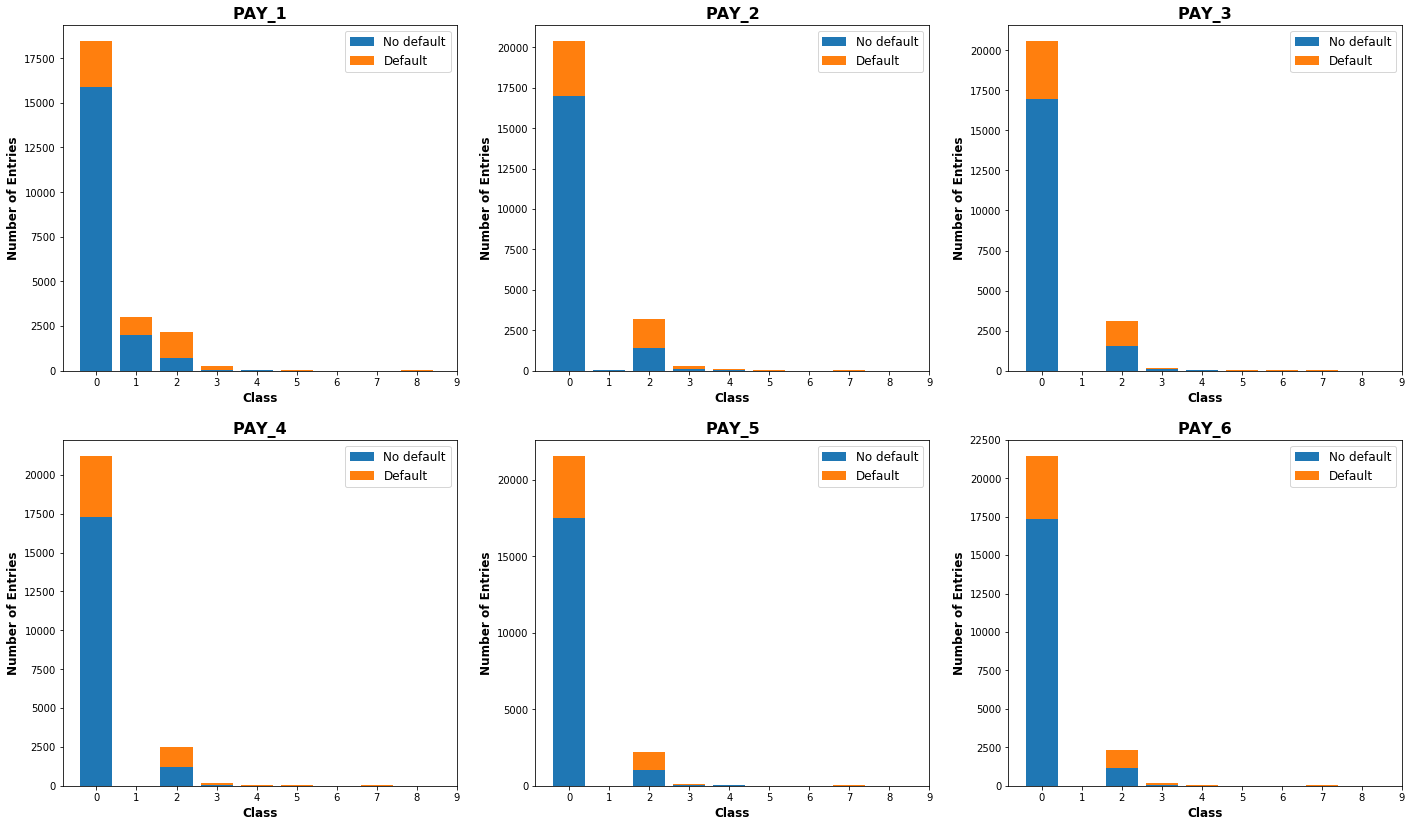

In [37]:
fig,axs=plt.subplots(2,3,figsize=(24,14))
x=1
for i in range(2):
    for j in range(3):
        axs[i][j].bar(list(ct_pay[i][j][0].index),ct_pay[i][j][0],label='No default')
        axs[i][j].bar(list(ct_pay[i][j][1].index),ct_pay[i][j][1],bottom=ct_pay[i][j][0],label='Default')
        axs[i][j].legend(fontsize=12)
        axs[i][j].set_xticks(np.arange(0,10))
        axs[i][j].set_title('PAY_%d'%(x),fontsize='16',fontweight='bold')
        axs[i][j].set_xlabel('Class',fontsize='12',fontweight='bold')
        axs[i][j].set_ylabel('Number of Entries',fontsize='12',fontweight='bold')
        x+=1
plt.show()

#### BILL_AMTx

`BILL_AMTx` is not categorical variable hence we will analyse by describing these columns.

In [38]:
train_data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000
mean,50596.884708,48646.064125,4.636706e+04,42368.188417,40000.682542,38563.710625
std,72649.374256,70364.600436,6.819390e+04,63070.680934,60345.012766,59155.759799
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3631.500000,3098.500000,2.773500e+03,2340.000000,1740.000000,1234.750000
50%,22330.000000,21339.000000,2.003900e+04,18940.500000,18107.500000,17036.000000
75%,65779.500000,62761.250000,5.929800e+04,52188.500000,49746.500000,48796.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


___Observations:___
- There are no missing values (verified by count = 24,000).
- There are negative values which may be due to the client overpaying the previous bill therefore leading to credit.
- The negative values are less than 25% (exactly 1.88%) of the total dataset. 

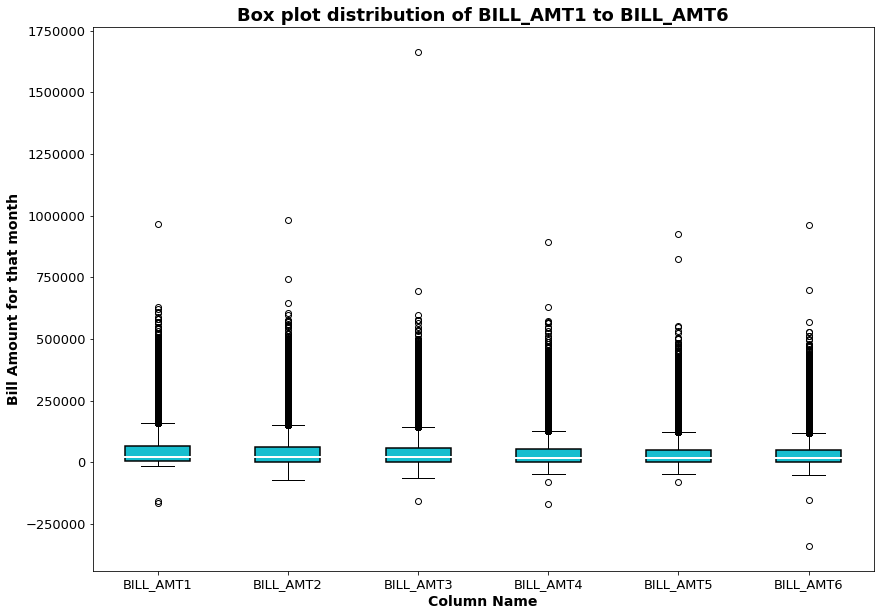

In [39]:
plt.figure(figsize = (14,10))
b=plt.boxplot([train_data['BILL_AMT1'],train_data['BILL_AMT2'],train_data['BILL_AMT3'],train_data['BILL_AMT4'],train_data['BILL_AMT5'],
             train_data['BILL_AMT6']],
           labels=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],
             patch_artist=True,
             medianprops={'linewidth':2,'color':'w'},
             boxprops={'linewidth':1.5})
for box in b['boxes']:
    box.set_facecolor('#17becf')
plt.title('Box plot distribution of BILL_AMT1 to BILL_AMT6',fontsize=18,fontweight='bold')
plt.xlabel('Column Name',fontsize=14,fontweight='bold')
plt.ylabel('Bill Amount for that month',fontsize=14,fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

(Explain why outlier had to be removed? Affects model promotes overfitting)

The bill amount shows a very large range (up to a maximum of 1.68m). However, from the concentration of the data points, we believe it would be reasonable to remove some of the extremities; we deemed this to be values above 50,000. This meant the removal of 5 points which is insignicant to the total data.

In [40]:
for i in range(1,7):    
    train_data=train_data[train_data['BILL_AMT%d'%(i)]<=750000]

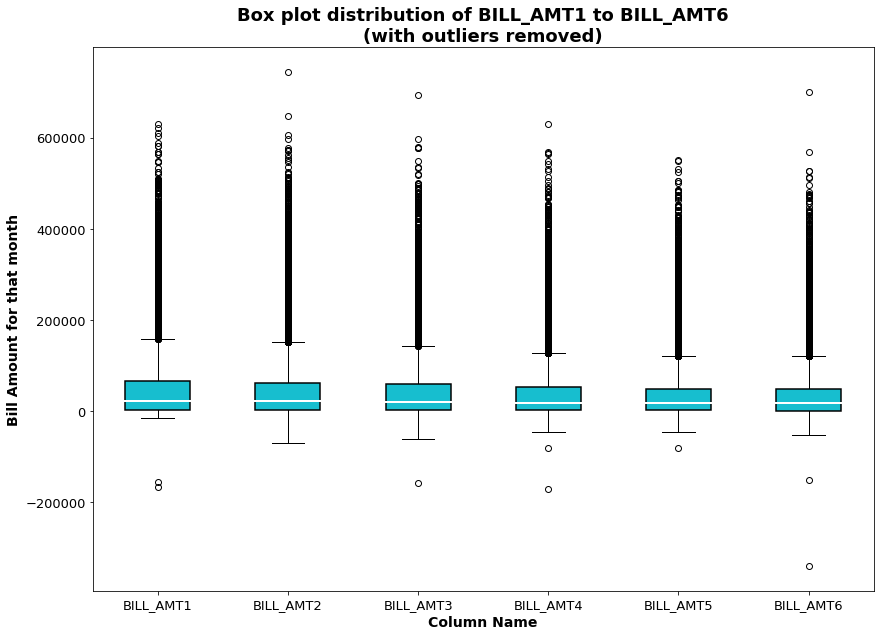

In [41]:
plt.figure(figsize = (14,10))
b=plt.boxplot([train_data['BILL_AMT1'],train_data['BILL_AMT2'],train_data['BILL_AMT3'],train_data['BILL_AMT4'],
             train_data['BILL_AMT5'],train_data['BILL_AMT6']],
             labels=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],
             patch_artist=True,
             medianprops={'linewidth':2,'color':'w'},
             boxprops={'linewidth':1.5})
for box in b['boxes']:
    box.set_facecolor('#17becf')
plt.title('Box plot distribution of BILL_AMT1 to BILL_AMT6\n(with outliers removed)',fontsize=18,fontweight='bold')
plt.xlabel('Column Name',fontsize=14,fontweight='bold')
plt.ylabel('Bill Amount for that month',fontsize=14,fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

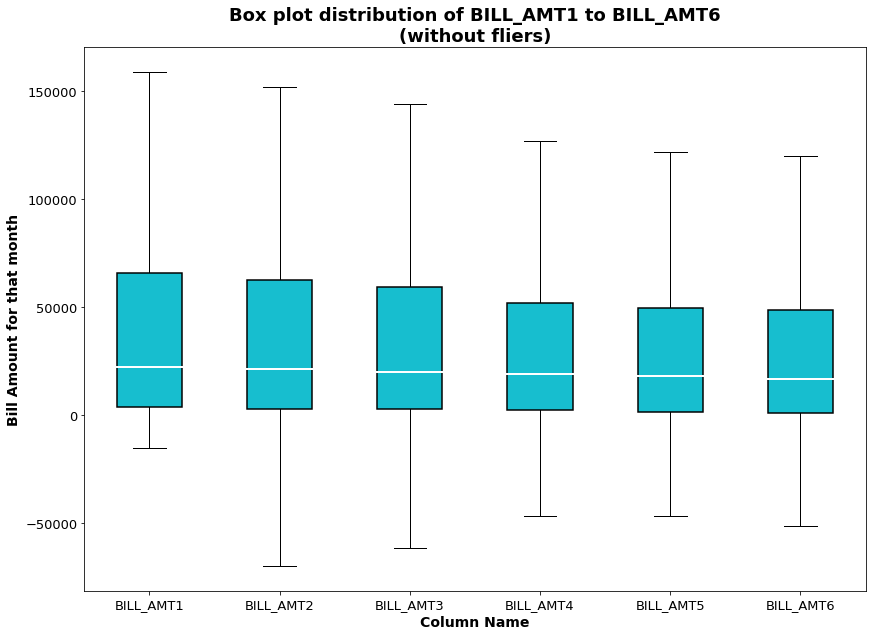

In [42]:
plt.figure(figsize = (14,10))
b=plt.boxplot([train_data['BILL_AMT1'],train_data['BILL_AMT2'],train_data['BILL_AMT3'],train_data['BILL_AMT4'],
             train_data['BILL_AMT5'],train_data['BILL_AMT6']],
             labels=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],
             showfliers=False,
             patch_artist=True,
             medianprops={'linewidth':2,'color':'w'},
             boxprops={'linewidth':1.5})
for box in b['boxes']:
    box.set_facecolor('#17becf')
plt.title('Box plot distribution of BILL_AMT1 to BILL_AMT6\n(without fliers)',fontsize=18,fontweight='bold')
plt.xlabel('Column Name',fontsize=14,fontweight='bold')
plt.ylabel('Bill Amount for that month',fontsize=14,fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

#### PAY_AMTx

`PAY_AMTx` is not categorical variable hence we will analyse by describing these columns.

In [43]:
train_data[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,23997.000000,23997.000000,23997.000000,23997.000000,23997.000000,23997.000000
mean,5540.349210,5742.804809,4926.720548,4737.919365,4765.430054,5186.081719
std,15066.264045,17750.132920,15014.460995,14869.204112,15075.708449,17628.324600
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,800.000000,379.000000,280.000000,244.000000,60.000000
50%,2100.000000,2000.000000,1702.000000,1500.000000,1500.000000,1500.000000
75%,5000.000000,5000.000000,4340.000000,4000.000000,4005.000000,4000.000000
max,505000.000000,580464.000000,417588.000000,497000.000000,417990.000000,528666.000000


___Observations:___
- The minimum payment amount is 0 which is as expected.
- August had the largest average bill of 5815 with the largest bill at 1.68m.
- August also had the most varied spending given by its higher than normal standard deviation. 
- There are no missing values (verified by count = 24,000).


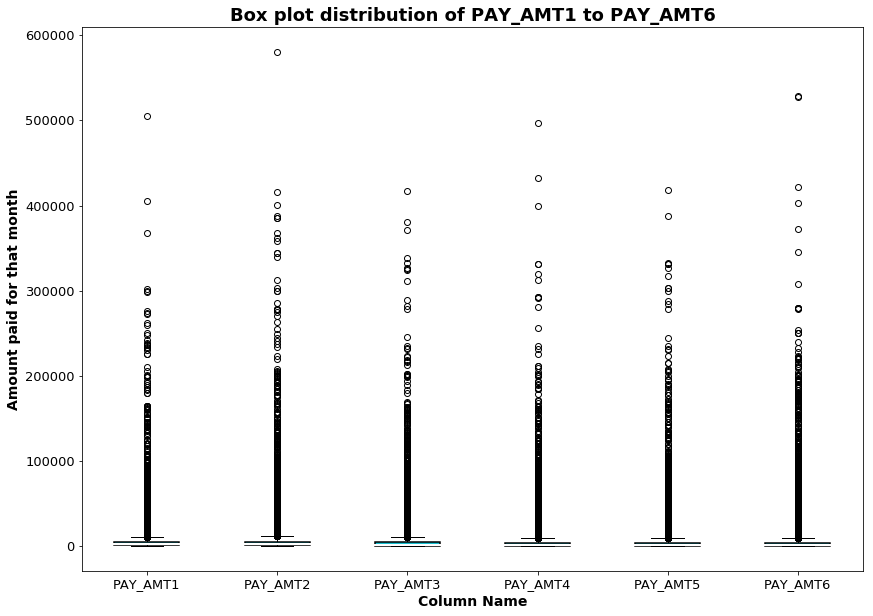

In [44]:
plt.figure(figsize = (14,10))
b=plt.boxplot([train_data['PAY_AMT1'],train_data['PAY_AMT2'],train_data['PAY_AMT3'],train_data['PAY_AMT4'],train_data['PAY_AMT5'],
             train_data['PAY_AMT6']],
           labels=['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],
             patch_artist=True,
             medianprops={'linewidth':2,'color':'w'},
             boxprops={'linewidth':1.5})
for box in b['boxes']:
    box.set_facecolor('#17becf')
plt.title('Box plot distribution of PAY_AMT1 to PAY_AMT6',fontsize=18,fontweight='bold')
plt.xlabel('Column Name',fontsize=14,fontweight='bold')
plt.ylabel('Amount paid for that month',fontsize=14,fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

The bill amount shows a very large range (up to a maximum of 1.68m). However, from the concentration of the data points, we believe it would be reasonable to remove some of the extremities; we deemed this to be values above 50,000. This meant the removal of 5 points which is insignicant to the total data.

In [45]:
for i in range(1,7):    
    train_data=train_data[train_data['PAY_AMT%d'%(i)]<=500000]

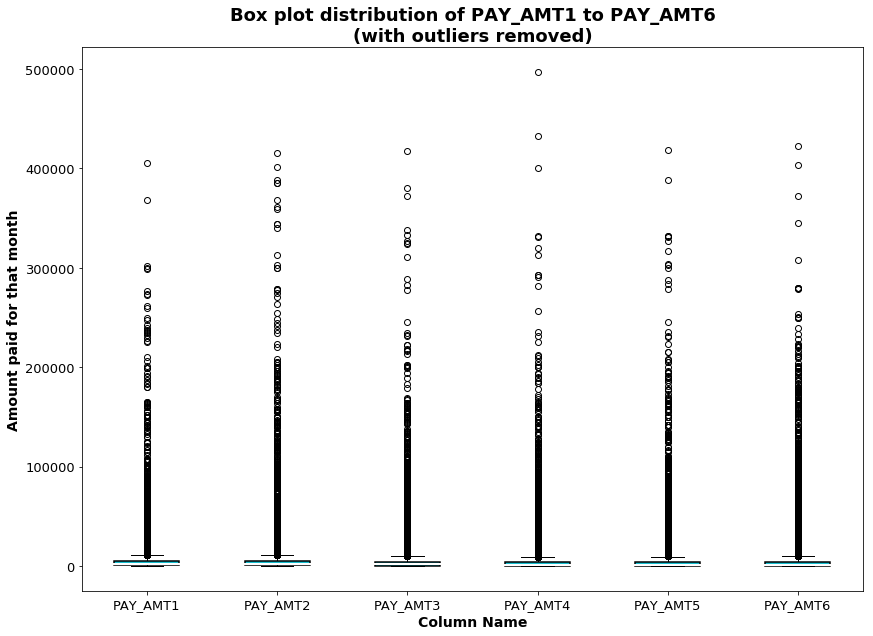

In [46]:
plt.figure(figsize = (14,10))
b=plt.boxplot([train_data['PAY_AMT1'],train_data['PAY_AMT2'],train_data['PAY_AMT3'],train_data['PAY_AMT4'],
             train_data['PAY_AMT5'],train_data['PAY_AMT6']],
             labels=['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],
             patch_artist=True,
             medianprops={'linewidth':2,'color':'w'},
             boxprops={'linewidth':1.5})
for box in b['boxes']:
    box.set_facecolor('#17becf')
plt.title('Box plot distribution of PAY_AMT1 to PAY_AMT6\n(with outliers removed)',fontsize=18,fontweight='bold')
plt.xlabel('Column Name',fontsize=14,fontweight='bold')
plt.ylabel('Amount paid for that month',fontsize=14,fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

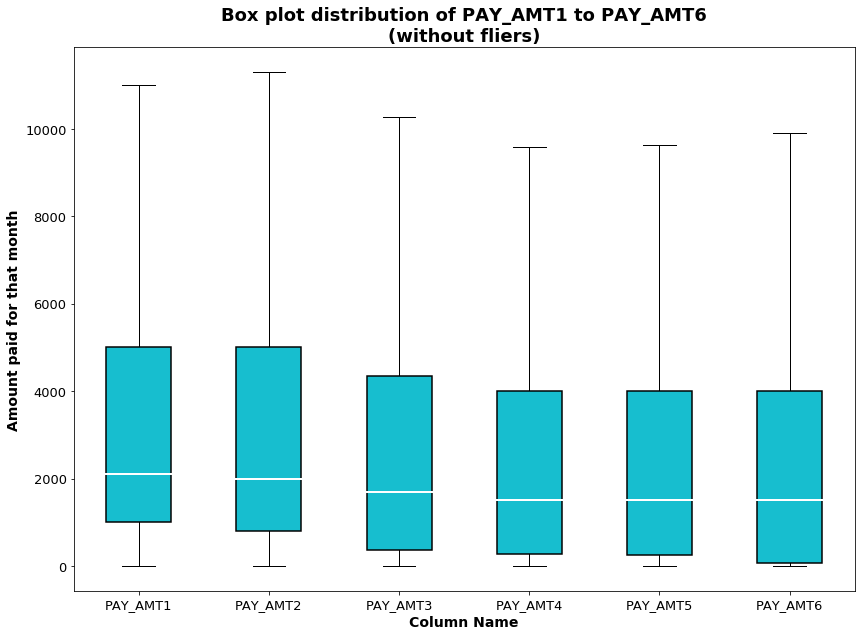

In [47]:
plt.figure(figsize = (14,10))
b=plt.boxplot([train_data['PAY_AMT1'],train_data['PAY_AMT2'],train_data['PAY_AMT3'],train_data['PAY_AMT4'],
             train_data['PAY_AMT5'],train_data['PAY_AMT6']],
             labels=['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],
             showfliers=False,
             patch_artist=True,
             medianprops={'linewidth':2,'color':'w'},
             boxprops={'linewidth':1.5})
for box in b['boxes']:
    box.set_facecolor('#17becf')
plt.title('Box plot distribution of PAY_AMT1 to PAY_AMT6\n(without fliers)',fontsize=18,fontweight='bold')
plt.xlabel('Column Name',fontsize=14,fontweight='bold')
plt.ylabel('Amount paid for that month',fontsize=14,fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

### Feature Extraction

#### `AGE_BINS` - Grouping Age into Age groups

Grouping age into age bins and converting age as a categorical variable can potentially give more insight than the age as such.

In [48]:
def age_conditions(df):
    if(df['AGE']<=24):
        return 0 #young adult
    elif(df['AGE']<=40):
        return 1 #adult
    elif(df['AGE']<=55):
        return 2 #middle-aged
    else:
        return 3 #senior

In [49]:
train_data['AGE_BINS'] = train_data.apply(age_conditions, axis=1)

#### `PAID_PERCENTx` - percentage of how much was paid from the bill amount

In [50]:
for i in range(1,7):
    train_data['PAID_PERCENT%d'%(i)]=(train_data['BILL_AMT%d'%(i)]-train_data['PAY_AMT%d'%(i)])/train_data['BILL_AMT%d'%(i)]

In [51]:
train_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT5,PAY_AMT6,Y,AGE_BINS,PAID_PERCENT1,PAID_PERCENT2,PAID_PERCENT3,PAID_PERCENT4,PAID_PERCENT5,PAID_PERCENT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,1,0,1.000000,0.777885,1.000000,NaN,NaN,NaN
2,120000,2,2,2,26,0,2,0,0,0,...,0,2000,1,1,1.000000,0.420290,0.627144,0.694377,1.000000,0.386691
3,90000,2,2,2,34,0,0,0,0,0,...,1000,5000,0,1,0.948083,0.893063,0.926248,0.930221,0.933101,0.678436
4,50000,2,2,1,37,0,0,0,0,0,...,1069,1000,0,1,0.957438,0.958141,0.975655,0.961150,0.963086,0.966156
5,50000,1,2,1,57,0,0,0,0,0,...,689,679,0,3,0.767901,-5.469312,0.720943,0.570201,0.964013,0.964508


we noticed -inf and NaN. on analysing table we found that NaN was when the bill amount was 0 and nothing was paid whereas -inf was when the bill amount was 0 but the customer paid an amount.

In [52]:
for i in range(1,7):
    train_data['PAID_PERCENT%d'%(i)].loc[(train_data['PAID_PERCENT%d'%(i)]== -np.inf)|(train_data['PAID_PERCENT%d'%(i)].isna())]=1.0

Next, the columns are rearranged so that similar columns are together.

In [53]:
train_data=train_data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE' ,'AGE_BINS', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','PAID_PERCENT1','PAID_PERCENT2',
       'PAID_PERCENT3','PAID_PERCENT4','PAID_PERCENT5','PAID_PERCENT6', 'Y']]

### Checking the balance of the dataset

Firstly, we have to check for imbalance in data, i.e. if the difference between the number of samples for each category is really high then the dataset is imbalanced. This will affect in training the model. 

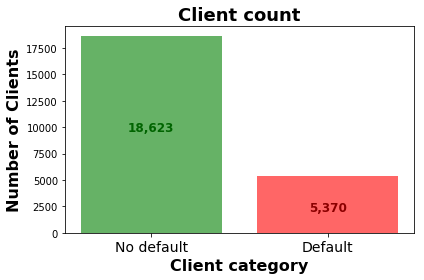

In [54]:
count_val=train_data['Y'].value_counts()

#Visualising the count
X_ticks=['No default','Default']
bar_width=0.7
fig,ax=plt.subplots()
plt.bar(1,count_val[0],color='g', alpha=0.6)
plt.bar(2,count_val[1],color='r', alpha=0.6)
plt.text(1, count_val[0]/2, "{:,}".format(count_val[0]),color='darkgreen', ha='center', va= 'bottom',fontweight='bold',fontsize=12)
plt.text(2, count_val[1]/3, "{:,}".format(count_val[1]), color='darkred',ha='center', va= 'bottom',fontweight='bold',fontsize=12)
ax.set_title('Client count',fontsize=18,fontweight='bold')
ax.set_xlabel('Client category',fontsize=16,fontweight='bold')
ax.set_ylabel('Number of Clients',fontsize=16,fontweight='bold')
ax.set_xticks([1,2])
ax.set_xticklabels(X_ticks,fontsize=14)
fig.tight_layout()
plt.show()

From the above observation it can be seen that the training data is not balanced. The number of samples there is higher number of samples for 'No default' class is much higher than that for 'Default' class.
Therefore, undersampling or oversampling is required. 
Undersampling can cause loss of features. Hence, oversampling will be considered in the 

### Calculate the correlation between the features

In [55]:
correlation = train_data.corr()
corr_array  = np.array(correlation)

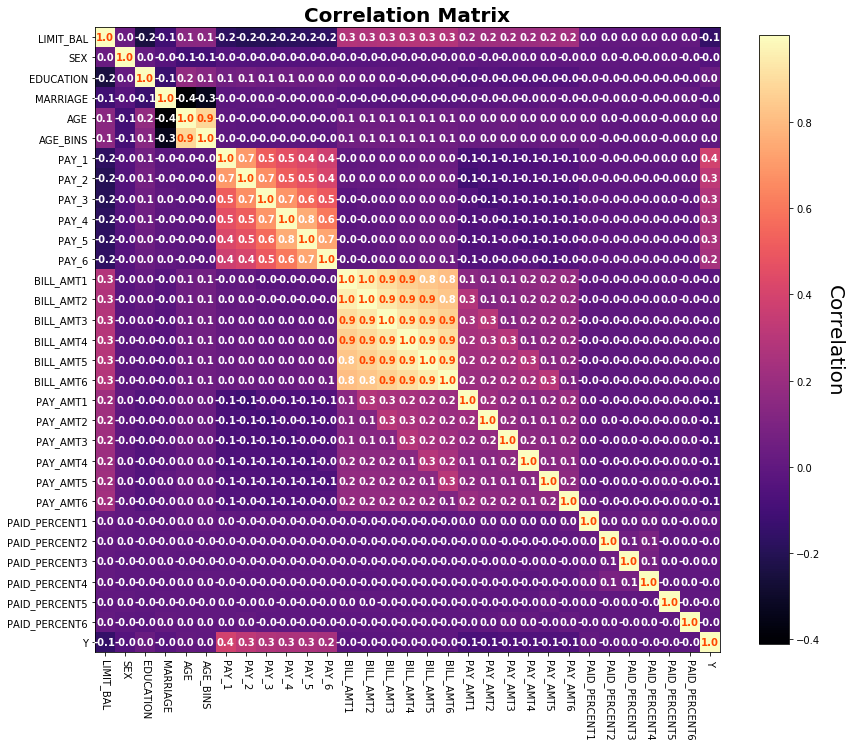

In [56]:
fig, ax = plt.subplots(figsize=(14,14))
im = ax.imshow(corr_array,cmap='magma')
cbar = ax.figure.colorbar(im, ax=ax,shrink=0.8)
cbar.ax.set_ylabel('Correlation', rotation=-90, va="bottom",fontsize=20)
data = im.get_array()
textcolors=['#FFFFFF','#FF4500']
for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, '%1.1f'%data[i, j], color=textcolors[data[i, j]>0.85],ha='center',va='center',fontweight='bold')
ax.set_title('Correlation Matrix',fontsize=20,fontweight='bold')
ax.set_xticks(np.arange(len(train_data.columns.tolist())))
ax.set_yticks(np.arange(len(train_data.columns)))
ax.set_xticklabels(train_data.columns,rotation=-90)
ax.set_yticklabels(train_data.columns)
fig.show()

Age bins,Education have considerable correlation with the credit limit. Marriage and age has a negative correlation. Payment history has decreasing 
PAY_x has a correlation with Y

### Data Preprocessing

#### Splitting categorical and continuous variables

In [57]:
X_categorical= train_data[['SEX', 'EDUCATION', 'MARRIAGE','AGE_BINS', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
X_continuous= train_data[['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','PAID_PERCENT1','PAID_PERCENT2',
       'PAID_PERCENT3','PAID_PERCENT4','PAID_PERCENT5','PAID_PERCENT6', ]]

#### Dummify categorical variables        

In [58]:
X_categorical=pd.get_dummies(data=X_categorical,columns=X_categorical.columns)

In [59]:
X_categorical.head()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE_BINS_0,...,PAY_5_7,PAY_5_8,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
ID,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Scale continous variables

In [60]:
for i in list(X_continuous.columns):
    X_continuous[i] = preprocessing.scale(np.array(X_continuous[i]))

# Model training and validation

In [61]:
X=pd.concat([X_categorical, X_continuous], axis=1)
Y=train_data['Y']

In [62]:
X_categorical.columns

Index(['SEX_1', 'SEX_2', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'AGE_BINS_0',
       'AGE_BINS_1', 'AGE_BINS_2', 'AGE_BINS_3', 'PAY_1_0', 'PAY_1_1',
       'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7',
       'PAY_1_8', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4',
       'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_0', 'PAY_3_1',
       'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7',
       'PAY_3_8', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4',
       'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_0', 'PAY_5_2',
       'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8',
       'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6',
       'PAY_6_7', 'PAY_6_8'],
      dtype='object')

In [63]:
X=X[['LIMIT_BAL',
     'SEX_1', 'SEX_2','AGE', 
     'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3','EDUCATION_4', 
     'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 
     'AGE_BINS_0','AGE_BINS_1', 'AGE_BINS_2', 'AGE_BINS_3', 
     'PAY_1_0', 'PAY_1_1','PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7','PAY_1_8', 
     'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4','PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 
     'PAY_3_0', 'PAY_3_1','PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7','PAY_3_8', 
     'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4','PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 
     'PAY_5_0', 'PAY_5_2','PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8',
     'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6','PAY_6_7', 'PAY_6_8',
     'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
     'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
     'PAID_PERCENT1','PAID_PERCENT2','PAID_PERCENT3','PAID_PERCENT4','PAID_PERCENT5','PAID_PERCENT6']]

In [64]:
scoring = ('accuracy','f1','roc_auc')

### Logistic Regression Classifier

In [65]:
model_LR = LogisticRegression(penalty='l1',n_jobs=8)
scores_LR = cross_validate(model_LR, X, Y, cv=10, scoring=scoring,return_train_score=True,n_jobs=8)

In [66]:
print('Accuracy: %f'%(scores_LR['test_accuracy'].mean()))  

Accuracy: 0.815948


In [67]:
print('f1 Score: %f'%(scores_LR['test_f1'].mean()))

f1 Score: 0.458867


In [68]:
print('ROC - AUC: %f'%(scores_LR['test_roc_auc'].mean()))

ROC - AUC: 0.757434


### k-NN Classifier

In [69]:
model_knn = KNeighborsClassifier(n_neighbors=5,n_jobs=8)

scores_knn = cross_validate(model_knn, X, Y, cv=10, scoring=scoring,return_train_score=True,n_jobs=8)

In [70]:
print('Accuracy: %f'%(scores_knn['test_accuracy'].mean()))  

Accuracy: 0.787856


In [71]:
print('f1 Score: %f'%(scores_knn['test_f1'].mean()))

f1 Score: 0.409759


In [72]:
print('ROC - AUC: %f'%(scores_knn['test_roc_auc'].mean()))

ROC - AUC: 0.694478


### Support Vector Classifier

In [73]:
model_svm = SVC()

scores_svm = cross_validate(model_svm, X, Y, scoring=scoring,cv=10, return_train_score=True,n_jobs=8)

In [74]:
print('Accuracy: %f'%(scores_svm['test_accuracy'].mean()))  

Accuracy: 0.816281


In [75]:
print('f1 Score: %f'%(scores_svm['test_f1'].mean()))

f1 Score: 0.439945


In [76]:
print('ROC - AUC: %f'%(scores_svm['test_roc_auc'].mean()))

ROC - AUC: 0.721197


### Gaussian Naive Bayes Classifier

In [77]:
model_gnb=GaussianNB()

scores_gnb=cross_validate(model_gnb,X,Y,scoring=scoring,cv=10,n_jobs=8)

In [78]:
print('Accuracy: %f'%(scores_gnb['test_accuracy'].mean()))  

Accuracy: 0.799401


In [79]:
print('f1 Score: %f'%(scores_gnb['test_f1'].mean()))

f1 Score: 0.364190


In [80]:
print('ROC - AUC: %f'%(scores_gnb['test_roc_auc'].mean()))

ROC - AUC: 0.742622


### SGD Classifier

In [81]:
model_sgd = SGDClassifier(max_iter=1000000, tol=1e-3)

scores_sgd=cross_validate(model_sgd,X,Y,scoring=scoring,cv=10,n_jobs=8)

In [82]:
print('Accuracy: %f'%(scores_sgd['test_accuracy'].mean()))  

Accuracy: 0.814947


In [83]:
print('f1 Score: %f'%(scores_sgd['test_f1'].mean()))

f1 Score: 0.440285


In [84]:
print('ROC - AUC: %f'%(scores_sgd['test_roc_auc'].mean()))

ROC - AUC: 0.725249


### Multi Layer Perceptron Classifier (Neural Networks)

In [85]:
model_mlp = MLPClassifier(solver='sgd',activation='identity',learning_rate='adaptive',
                          hidden_layer_sizes=(8, 2), random_state=76)
scores_mlp=cross_validate(model_mlp,X,Y,scoring=scoring,cv=10,n_jobs=8)

In [86]:
print('Accuracy: %f'%(scores_mlp['test_accuracy'].mean()))  

Accuracy: 0.814864


In [87]:
print('f1 Score: %f'%(scores_mlp['test_f1'].mean()))

f1 Score: 0.454895


In [88]:
print('ROC - AUC: %f'%(scores_mlp['test_roc_auc'].mean()))

ROC - AUC: 0.758015


### Random Forest Classifier

In [89]:
model_rfc = RandomForestClassifier(n_estimators=100,n_jobs=8)

scores_rfc = cross_validate(model_rfc, X, Y, scoring=scoring,cv=10, return_train_score=True,n_jobs=8)

`(n_estimators=100,min_samples_split=12, max_leaf_nodes=90, max_depth=8,n_jobs=8)` - Gave the best results so far

In [90]:
print('Accuracy: %f'%(scores_rfc['test_accuracy'].mean()))  

Accuracy: 0.814197


In [91]:
print('f1 Score: %f'%(scores_rfc['test_f1'].mean()))

f1 Score: 0.476015


In [92]:
print('ROC - AUC: %f'%(scores_rfc['test_roc_auc'].mean()))

ROC - AUC: 0.755453


# Results

### Score Comparison

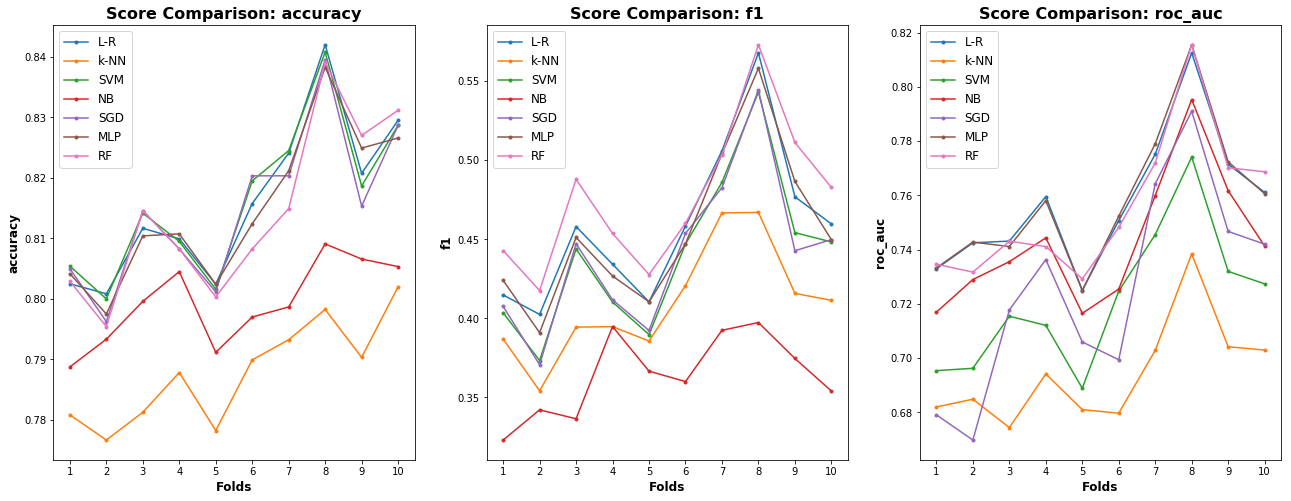

In [93]:
index=np.arange(1,11)
fig,axs=plt.subplots(1,3,figsize=(22,8))

for ind,score in zip(np.arange(3),['accuracy','f1','roc_auc']):
    axs[ind].plot(index,scores_LR['test_%s'%(score)],label='L-R',marker='.')
    axs[ind].plot(index,scores_knn['test_%s'%(score)],label='k-NN',marker='.')
    axs[ind].plot(index,scores_svm['test_%s'%(score)],label='SVM',marker='.')
    axs[ind].plot(index,scores_gnb['test_%s'%(score)],label='NB',marker='.')
    axs[ind].plot(index,scores_sgd['test_%s'%(score)],label='SGD',marker='.')
    axs[ind].plot(index,scores_mlp['test_%s'%(score)],label='MLP',marker='.')
    axs[ind].plot(index,scores_rfc['test_%s'%(score)],label='RF',marker='.')
    axs[ind].set_xticks(np.arange(1,11))
    axs[ind].legend(fontsize=12)
    axs[ind].set_xlabel('Folds',fontsize=12,fontweight='bold')
    axs[ind].set_ylabel('%s'%(score),fontsize=12,fontweight='bold')
    axs[ind].set_title('Score Comparison: %s'%(score),fontsize=16,fontweight='bold')

plt.show()

>RF LR MLP is the best performing. 

In [212]:
model_name=['Random Forest Classifier','Logistic Regression Classifer','Multi Layer Perceptron']
accuracy_scores=[scores_rfc['test_accuracy'].mean(),scores_LR['test_accuracy'].mean(),scores_mlp['test_accuracy'].mean()]
f1_scores=[scores_rfc['test_f1'].mean(),scores_LR['test_f1'].mean(),scores_mlp['test_f1'].mean()]
roc_auc_scores=[scores_rfc['test_roc_auc'].mean(),scores_LR['test_roc_auc'].mean(),scores_mlp['test_roc_auc'].mean()]
print('Maximum Accuracy is for %s'%model_name[np.argmax(accuracy_scores)])
print('Maximum f1 score is for %s'%model_name[np.argmax(f1_scores)])
print('Maximum ROC_AUC is for %s'%model_name[np.argmax(roc_auc_scores)])

Maximum Accuracy is for Logistic Regression Classifer
Maximum f1 score is for Random Forest Classifier
Maximum ROC_AUC is for Multi Layer Perceptron


In [237]:
graph_data=pd.DataFrame({'Model':model_name,'Accuracy':accuracy_scores,'f1':f1_scores,'roc_auc':roc_auc_scores})
graph_data

,Model,Accuracy,f1,roc_auc
0,Random Forest Classifier,0.814197,0.476015,0.755453
1,Logistic Regression Classifer,0.815948,0.458867,0.757434
2,Multi Layer Perceptron,0.814864,0.454895,0.758015


In [94]:
model_rfc.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=8,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Feature Selection

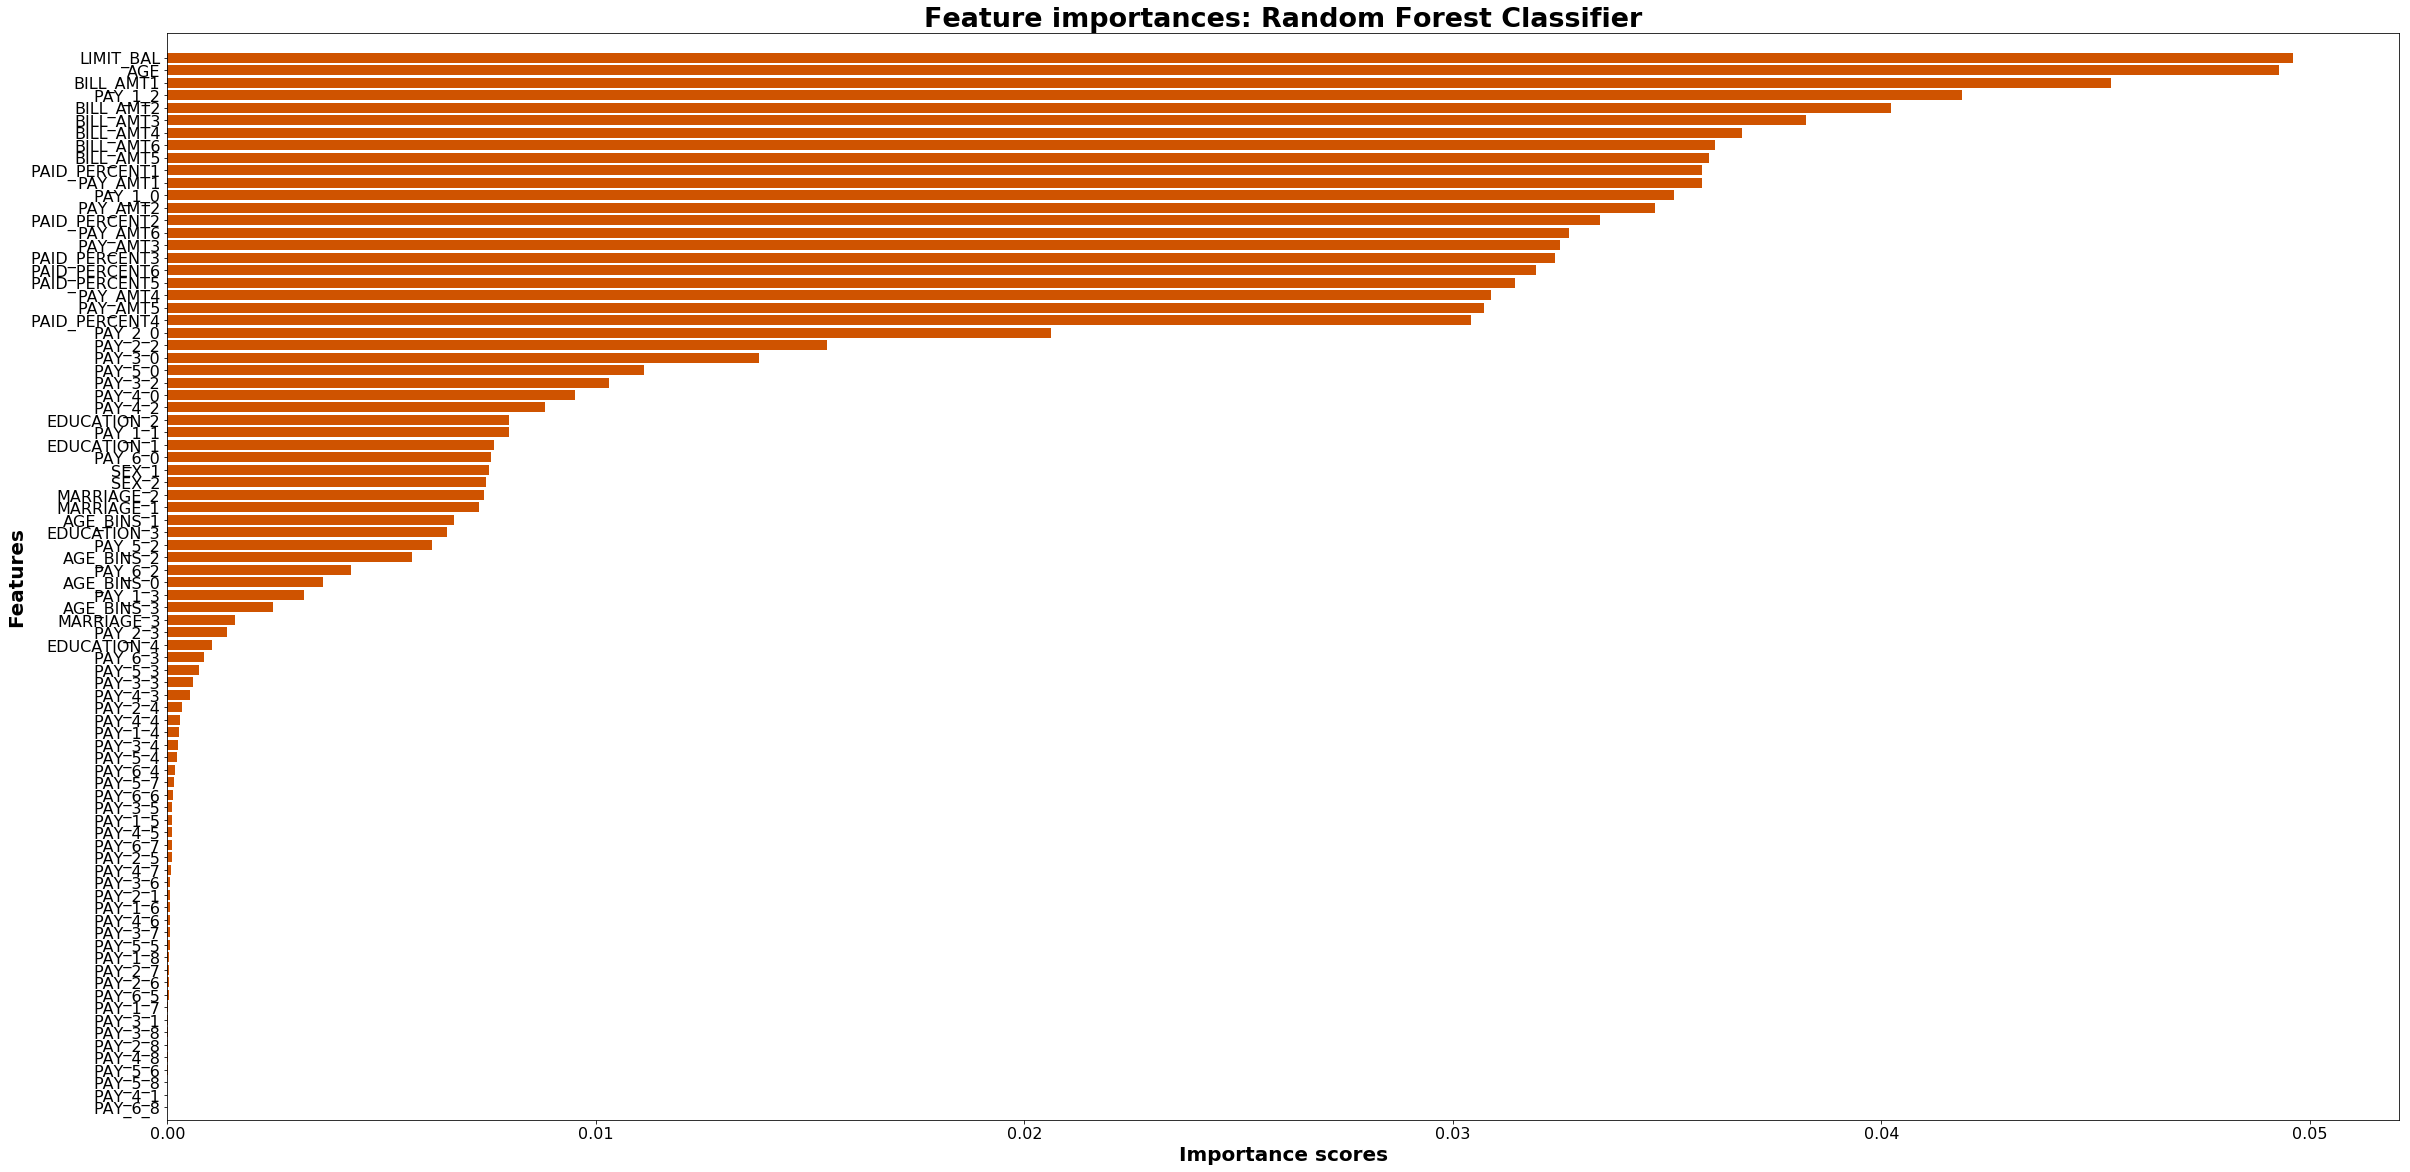

In [95]:
model_imp_df = pd.DataFrame({'Features':X.columns})
model_imp_df['Importance']=model_rfc.feature_importances_.tolist()
model_imp_df = model_imp_df.sort_values(by=['Importance'])
index=np.arange(X.shape[1])

plt.figure(figsize=(40,20))

plt.barh(index,model_imp_df['Importance'], align='center',color='#CF5300')
plt.title('Feature importances: Random Forest Classifier',fontsize=27,fontweight='bold')
plt.xlabel('Importance scores',fontsize=20,fontweight='bold')
plt.ylabel('Features',fontsize=20,fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(index,model_imp_df['Features'],fontsize=16)
plt.ylim([-1, X.shape[1]+1])
plt.show()

___Observations:___
- PAY_AMTx, BILL_AMTx and PAID_PERCENTx are among the most important features. 
- AGE seems to be more important than AGE_BIN. PAY_x does not seem to be important.

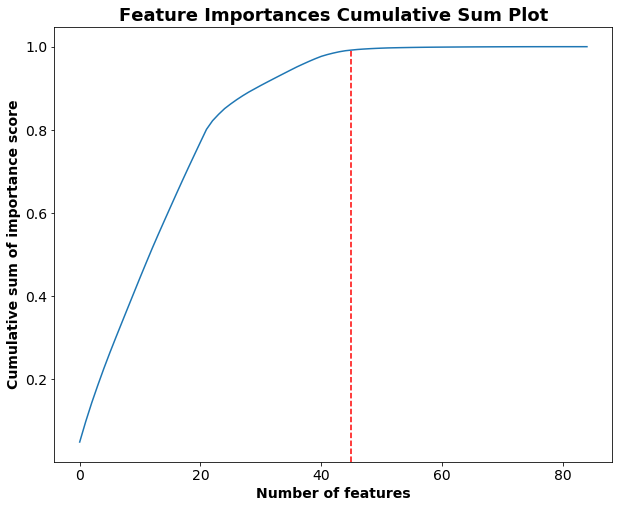

In [255]:
model_imp_df = model_imp_df.sort_values(by=['Importance'],ascending=False)
model_imp_df['Importance_cumsum'] = model_imp_df['Importance'].cumsum(axis = 0)
index=np.arange(len(model_imp_df['Importance']))
plt.figure(figsize=(10,8))
plt.plot(index,model_imp_df['Importance_cumsum'])
plt.title('Feature Importances Cumulative Sum Plot',fontsize=18,fontweight='bold')
plt.xlabel('Number of features',fontsize=14,fontweight='bold')
plt.ylabel('Cumulative sum of importance score',fontsize=14,fontweight='bold')
plt.axvline(x=45,linestyle='--',color='r',ymax=0.95)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

We can see from the above plot that at about number of features=45 the plot is almost straight. This indicates very low values of feature importance. The value at 45th index is ~0.0015. Therefore, it is reasonable to set the threshold at 10^-3 for feature selection.

In [261]:
fs_model = SelectFromModel(model_rfc, prefit=True)
X_selected = fs_model.transform(X)

The selected features are:

In [263]:
X.columns[fs_model.get_support()]

Index(['LIMIT_BAL', 'AGE', 'PAY_1_0', 'PAY_1_2', 'PAY_2_0', 'PAY_2_2',
       'PAY_3_0', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAID_PERCENT1', 'PAID_PERCENT2',
       'PAID_PERCENT3', 'PAID_PERCENT4', 'PAID_PERCENT5', 'PAID_PERCENT6'],
      dtype='object')

### Hyperparameter Tuning

In [96]:
param_grid={'max_depth': np.arange(3, 15),
             'max_leaf_nodes':np.arange(50,130,5),
             'min_samples_split': np.arange(2, 22,2)}

#### With refit='accuracy'

In [100]:
grid_accuracy = RandomizedSearchCV(model_rfc, param_grid, cv=10,n_jobs=8, scoring=scoring,refit='accuracy')
grid_accuracy.fit(X, Y)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=8,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=8,
          param_distributions={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'max_leaf_nodes': array([ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110,
       115, 120, 125]), 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])},
          pre_dispatch='2*n_jobs', random_state=None, refit='accuracy',
          return_train_score='warn', scoring=('accuracy', 'f1', 'roc_auc'),
    

In [101]:
print('Best mean Accuracy Score: ',grid_accuracy.best_score_)
print('Best parameters: \n',grid_accuracy.best_params_)

Best mean Accuracy Score:  0.8176968282415704
Best parameters: 
 {'min_samples_split': 16, 'max_leaf_nodes': 55, 'max_depth': 12}


In [102]:
results_accuracy=grid_accuracy.cv_results_

In [103]:
results_accuracy['mean_test_accuracy'].max()

0.8176968282415704

In [111]:
best_index_accuracy = np.nonzero(results_accuracy['rank_test_accuracy'] == 1)[0][0]
results_accuracy['mean_test_roc_auc'][best_index_accuracy]

0.7720668063371521

#### With refit='roc_auc'

In [104]:
grid_roc_auc = RandomizedSearchCV(model_rfc, param_grid, cv=10,n_jobs=8, scoring=scoring,refit='roc_auc')
grid_roc_auc.fit(X, Y)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=8,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=8,
          param_distributions={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'max_leaf_nodes': array([ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110,
       115, 120, 125]), 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])},
          pre_dispatch='2*n_jobs', random_state=None, refit='roc_auc',
          return_train_score='warn', scoring=('accuracy', 'f1', 'roc_auc'),
     

In [105]:
print('Best mean ROC_AUC Score: ',grid_roc_auc.best_score_)
print('Best parameters: \n',grid_roc_auc.best_params_)

Best mean ROC_AUC Score:  0.7732557660924434
Best parameters: 
 {'min_samples_split': 6, 'max_leaf_nodes': 125, 'max_depth': 11}


In [113]:
results_roc_auc=grid_roc_auc.cv_results_

In [114]:
results_roc_auc['mean_test_roc_auc'].max()

0.7732557660924434

In [115]:
best_index_roc_auc = np.nonzero(results_roc_auc['rank_test_roc_auc'] == 1)[0][0]
results_roc_auc['mean_test_roc_auc'][best_index_roc_auc]

0.7732557660924434

>Comparing the above two models, the first model seems to be better since the roc_auc score is pretty much the same but accuracy is much better for the first model so that can be chosen.

### Implementing the chosen model with best parameters

In [266]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=16, max_leaf_nodes=55,
                               max_depth=12,n_jobs=8)

In [267]:
model.fit(X_selected,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=55,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=16,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=8,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Final Predictions on test set

Test data from a different file or location can be read by __changing the argument value__ of the `pd.read_csv()` function with the path to the file.

In [168]:
test_data=pd.read_csv('CreditCard_test.csv')

In [169]:
test_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,24001,50000,1,2,2,23,2,2,0,0,...,44116,21247,20066,8,2401,2254,2004,704,707,0
2,24002,60000,1,2,2,26,0,0,0,0,...,55736,26958,28847,2282,2324,2049,2000,3000,1120,1
3,24003,400000,1,2,2,27,0,0,0,0,...,10745,20737,9545,2501,10009,1437,1105,510,959,0
4,24004,20000,1,5,2,27,5,4,3,2,...,19709,20113,19840,0,0,0,900,0,0,0


In [170]:
test_data.rename(columns=(test_data.iloc[0]),inplace=True)
test_data.drop(index=[0],inplace=True)
test_data.rename(columns={'default payment next month':'Y'},inplace=True)

In [171]:
test_data=test_data.astype(int)

In [172]:
pd.DataFrame(test_data['EDUCATION'].value_counts().sort_index())

,EDUCATION
0,3
1,2142
2,2670
3,1067
4,31
5,73
6,14


0, 5 and 6 are undocumented. However since the meaning of these labels are unknown it makes sense to replace the values by class 4 which means others.

In [173]:
test_data['EDUCATION'].loc[(test_data['EDUCATION']==0)|(test_data['EDUCATION']==5)|(test_data['EDUCATION']==6)]=4

In [174]:
pd.DataFrame(test_data['MARRIAGE'].value_counts().sort_index())

,MARRIAGE
0,13
1,2846
2,3087
3,54


0 is undocumented. However since the meaning of these labels are unknown it makes sense to replace the values by class 3 which means others.

In [175]:
test_data['MARRIAGE'].loc[(test_data['MARRIAGE']==0)]=3

In [176]:
d_test=pd.DataFrame(test_data['PAY_0'].value_counts().sort_index())
d_test['PAY_2']=pd.DataFrame(test_data['PAY_2'].value_counts().sort_index())
d_test['PAY_3']=pd.DataFrame(test_data['PAY_3'].value_counts().sort_index())
d_test['PAY_4']=pd.DataFrame(test_data['PAY_4'].value_counts().sort_index())
d_test['PAY_5']=pd.DataFrame(test_data['PAY_5'].value_counts().sort_index())
d_test['PAY_6']=pd.DataFrame(test_data['PAY_6'].value_counts().sort_index())
d_test

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
-2,673,829.0,888.0,966.0,1007.0,1077.0
-1,1061,1163.0,1151.0,1132.0,1056.0,1018.0
0,2998,3187.0,3187.0,3204.0,3427.0,3409.0
1,694,8.0,NaN,NaN,NaN,NaN
2,482,723.0,698.0,644.0,448.0,442.0
3,68,58.0,57.0,22.0,31.0,26.0
4,10,23.0,12.0,14.0,13.0,12.0
5,9,4.0,4.0,6.0,6.0,4.0
6,2,3.0,2.0,NaN,1.0,3.0
7,2,2.0,NaN,12.0,11.0,9.0


In [177]:
test_data.rename(columns={'PAY_0':'PAY_1'},inplace=True)

In [178]:
for i in range(1,7):
    test_data['PAY_%d'%i].loc[(test_data['PAY_%d'%i]==-1)|(test_data['PAY_%d'%i]==-2)]=0

In [179]:
test_data['AGE_BINS'] = test_data.apply(age_conditions, axis=1)

In [180]:
for i in range(1,7):
    test_data['PAID_PERCENT%d'%(i)]=(test_data['BILL_AMT%d'%(i)]-test_data['PAY_AMT%d'%(i)])/test_data['BILL_AMT%d'%(i)]
    test_data['PAID_PERCENT%d'%(i)].loc[(test_data['PAID_PERCENT%d'%(i)]== -np.inf)|(test_data['PAID_PERCENT%d'%(i)].isna())]=1.0

In [181]:
X_categorical_test= test_data[['SEX', 'EDUCATION', 'MARRIAGE','AGE_BINS', 
                               'PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
X_continuous_test= test_data[['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','PAID_PERCENT1','PAID_PERCENT2',
       'PAID_PERCENT3','PAID_PERCENT4','PAID_PERCENT5','PAID_PERCENT6', ]]

In [182]:
X_categorical_test=pd.get_dummies(data=X_categorical_test,columns=X_categorical_test.columns)

In [183]:
for i in list(X_continuous_test.columns):
    X_continuous_test[i] = preprocessing.scale(np.array(X_continuous_test[i]))

In [184]:
X_test=pd.concat([X_categorical_test, X_continuous_test], axis=1)

In [185]:
X_test.head()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE_BINS_0,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAID_PERCENT1,PAID_PERCENT2,PAID_PERCENT3,PAID_PERCENT4,PAID_PERCENT5,PAID_PERCENT6
1,1,0,0,1,0,0,0,1,0,1,...,-0.176586,-0.170727,-0.271657,-0.251335,-0.014175,-0.024244,-0.019408,-0.024920,0.002347,-0.000382
2,1,0,0,1,0,0,0,1,0,0,...,-0.185642,-0.170943,-0.121687,-0.228833,-0.014672,-0.024128,-0.019399,-0.024777,0.000422,-0.000510
3,1,0,0,1,0,0,0,1,0,0,...,-0.212677,-0.219413,-0.284329,-0.237605,-0.016246,-0.038834,-0.019467,-0.025775,0.002557,-0.002693
4,1,0,0,0,0,1,0,1,0,0,...,-0.276158,-0.230516,-0.317641,-0.289856,-0.014173,-0.023611,-0.019372,-0.024923,0.003163,0.000865
5,1,0,0,0,1,0,0,1,0,0,...,-0.276158,-0.275465,-0.304578,-0.284407,-0.014173,-0.010492,-0.019372,-0.024243,-0.067211,-0.028647


In [186]:
len(X.columns)==len(X_test.columns)

False

In [187]:
missing_columns=list(set(X.columns)-set(X_test.columns))

In [191]:
for column in missing_columns:    
    X_test[column]=0

In [192]:
X_test.columns

Index(['SEX_1', 'SEX_2', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'AGE_BINS_0',
       'AGE_BINS_1', 'AGE_BINS_2', 'AGE_BINS_3', 'PAY_1_0', 'PAY_1_1',
       'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7',
       'PAY_1_8', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4',
       'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_3_0', 'PAY_3_2', 'PAY_3_3',
       'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_8', 'PAY_4_0', 'PAY_4_2',
       'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_7', 'PAY_5_0', 'PAY_5_2',
       'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_6_0',
       'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7',
       'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAID_PERCENT1', 'PAID_PERCENT2',
       'PAID_PERCENT3', 'PAID_PERCENT4', 'PAI

In [193]:
X_test=X_test[['LIMIT_BAL',
     'SEX_1', 'SEX_2','AGE', 
     'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3','EDUCATION_4', 
     'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 
     'AGE_BINS_0','AGE_BINS_1', 'AGE_BINS_2', 'AGE_BINS_3', 
     'PAY_1_0', 'PAY_1_1','PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7','PAY_1_8', 
     'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4','PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 
     'PAY_3_0', 'PAY_3_1','PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7','PAY_3_8', 
     'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4','PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 
     'PAY_5_0', 'PAY_5_2','PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8',
     'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6','PAY_6_7', 'PAY_6_8',
     'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
     'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
     'PAID_PERCENT1','PAID_PERCENT2','PAID_PERCENT3','PAID_PERCENT4','PAID_PERCENT5','PAID_PERCENT6']]
Y_test=test_data['Y']

In [268]:
X_test_selected=X_test[X.columns[fs_model.get_support()]]

In [270]:
y_predict=model.predict(X_test_selected)

In [271]:
from sklearn import metrics

print('Accuracy: ',(metrics.accuracy_score(Y_test, y_predict)))
print('f1 Score: ',(metrics.f1_score(Y_test, y_predict)))
print('ROC AUC : ',(metrics.roc_auc_score(Y_test, y_predict)))

Accuracy:  0.8078333333333333
f1 Score:  0.22772940388479573
ROC AUC :  0.5611203214819888


In [240]:
model_LR.fit(X,Y)
y_predict2=model_LR.predict(X_test)

In [241]:
print('Accuracy: ',(metrics.accuracy_score(Y_test, y_predict2)))
print('f1 Score: ',(metrics.f1_score(Y_test, y_predict2)))
print('ROC AUC : ',(metrics.roc_auc_score(Y_test, y_predict2)))

Accuracy:  0.8333333333333334
f1 Score:  0.46921443736730367
ROC AUC :  0.6559766296850253


In [238]:
model_mlp.fit(X,Y)
y_predict3=model_mlp.predict(X_test)

In [239]:
print('Accuracy: ',(metrics.accuracy_score(Y_test, y_predict3)))
print('f1 Score: ',(metrics.f1_score(Y_test, y_predict3)))
print('ROC AUC : ',(metrics.roc_auc_score(Y_test, y_predict3)))

Accuracy:  0.8331666666666667
f1 Score:  0.46952835188129305
ROC AUC :  0.6561603365389428


# References

[1] Yeh, I-Cheng, and Che-hui Lien. "The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients." Expert Systems with Applications 36.2 (2009): 2473-2480.

[2] Preda, G. (2018). Default of Credit Card Clients - Predictive Models. [online] Kaggle. Available at: https://www.kaggle.com/gpreda/default-of-credit-card-clients-predictive-models/notebook?scriptVersionId=5201547 [Accessed 6 Dec. 2018].

[3] https://matplotlib.org/gallery/index.html

[4] https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0

[5] https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

[6] https://scikit-learn.org/stable/model_selection.html#model-selection

[7] https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
